In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
# np.set_printoptions(threshold=np.inf)

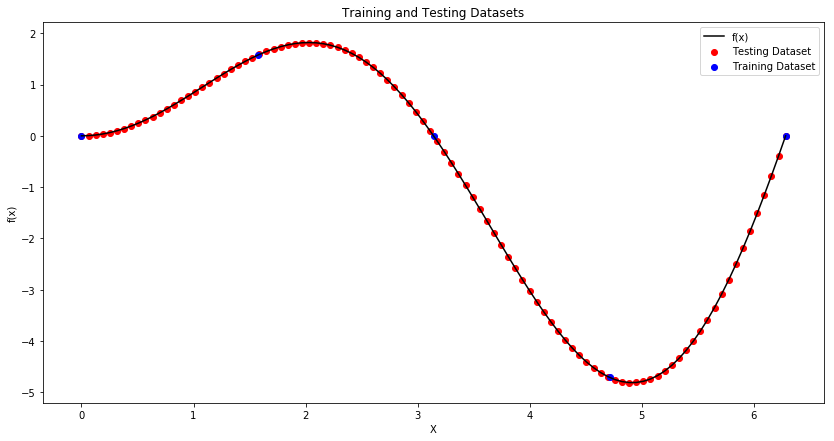

<Figure size 432x288 with 0 Axes>

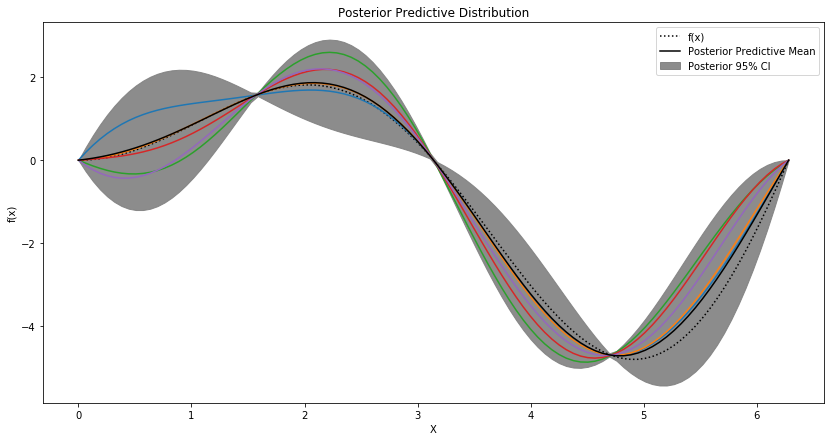

In [2]:
def f(x):
    """Function to be modeled."""
    return x * np.sin(x)

def f_eps(x, sigma_noise=0):
    """Observed function."""
    return f(x) + np.random.normal(loc=0, scale=sigma_noise, size=x.shape)

def RBF(x1, x2, l=np.pi, var_s=100):
    """Kernel function."""
    dx2 = (x1-x2)**2
    return var_s * np.exp(-dx2 / (2 * l))

"""Generate data."""
nObs = 100
nTrain = 5
nTest = nObs - nTrain
X = np.linspace(0, 2*np.pi, num=nObs)
Y = f_eps(X)

Xtrain, Ytrain = np.linspace(X[0], X[-1], nTrain), f_eps(np.linspace(X[0], X[-1], nTrain))
Xtest, Ytest = X, Y

"""Generate relevant covariance matrices."""
x1, x2 = np.meshgrid(Xtrain, Xtrain)
K = RBF(x1, x2)
x1, x2 = np.meshgrid(Xtest, Xtest)
Kss = RBF(x1, x2)
x1, x2 = np.meshgrid(Xtest, Xtrain)
Ks = RBF(x1, x2)

"""Calculate posterior distribution mean and covariance matrix, and standard deviations at each point."""
# See Rasmussen and Williams 2006 Eq. 2.25 and 2.26.
eps = 1.49e-08
fbar_s = Ks.T.dot(np.linalg.inv(K + eps*np.eye(nTrain)).dot(Ytrain))
V_s = Kss - Ks.T.dot(np.linalg.inv(K + eps*np.eye(nTrain)).dot(Ks))
sigma = np.sqrt(np.abs(np.diag(V_s)))

"""Draw some functions from the posterior distribution."""
draw = np.random.multivariate_normal(fbar_s, V_s, size=5).T

"""Order posterior distribution mean and standard deviation for plotting."""
ind = Xtest.argsort()
Xtest = Xtest[ind]
Ytest = Ytest[ind]
Ypred = fbar_s[ind]
draw = draw[ind, :]
sigma = sigma[ind]

"""Plot data."""
plt.figure(figsize=(14, 7))
plt.title('Training and Testing Datasets')
plt.xlabel('X')
plt.ylabel('f(x)')
plt.plot(X, f(X), label='f(x)', color='black')
plt.scatter(Xtest, Ytest, label='Testing Dataset', color='red')
plt.scatter(Xtrain, Ytrain, label='Training Dataset', color='blue')
plt.legend()
plt.show()
plt.clf()


"""Plot posterior data."""
plt.figure(figsize=(14, 7))
plt.title('Posterior Predictive Distribution')
plt.xlabel('X')
plt.ylabel('f(x)')

plt.plot(X, f(X), label='f(x)', ls=':', color='black')
plt.plot(Xtest, draw)

plt.plot(Xtest, Ypred, label='Posterior Predictive Mean', color='black')
plt.fill_between(Xtest, Ypred - 2 * sigma, Ypred + 2 * sigma, alpha=0.9, label=r'Posterior 95% CI', color='gray')

plt.legend()
plt.show()